In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import control as ct

from scipy.signal import welch
from numpy.random import rand

In [ ]:
print("Hello world")

In [2]:
class ADC:
    def __init__(self, interval, bits):
        '''
        interval: tuple or list
                sequence of (min, max) pair of the reference voltage
        '''
        if type(bits) is not int:
            raise TypeError("bits must be integer.")
        if bits <= 0:
            raise ValueError("bits must be greater than zero.")
        min_input, max_input = interval
        self.interval = interval
        self.bits = bits
        self.LSB = abs(max_input - min_input)/2**bits
        
    def quantize(self, analog_input_signal):
        min_input, max_input = self.interval
        if (analog_input_signal < min_input).any() + (analog_input_signal > max_input).any():
            raise Exception("analog_input_signal outside the analog input interval of ADC.")
        LSB = self.LSB
        normalized_input_signal = (analog_input_signal - min_input)/LSB
#         normalized_bins = np.arange(2**self.bits) + 0.5
        quan_signal = np.round(normalized_input_signal)    
        quan_signal *= LSB
        quan_signal += min_input
        quan_noise = quan_signal - analog_input_signal
        return (quan_signal, quan_noise)

In [20]:
def white_noise_approx(LSB, length, width, seed):
    if seed!='':
        np.random.seed(seed)
    return LSB*(rand(length, width) - 0.5)

SNR = 6799.519
9.797087900002875e-06
SNR = 6917.298
9.623164216702435e-06


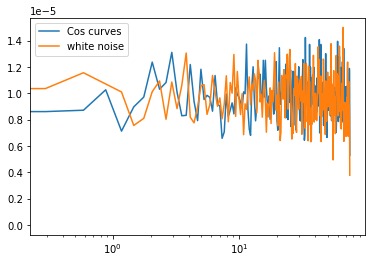

In [74]:
time = 100
fs = 150
length = int(time*fs)
t = np.linspace(0, time, length)

np.random.seed(3)
omegas = rand(10)*10
np.random.seed(5)
A = rand(len(omegas))
signal = 0
for i, omega in enumerate(omegas):
    signal += np.cos(omega*t)

np.random.seed(5)
signal1 = 10*(rand(length) - 0.5)

interval = (-12, 12)
bits = 8
convertor = ADC(interval, bits)
for Sx, label in zip([signal, signal1], ["Cos curves", "white noise"]):
    quantized, quan_noise = convertor.quantize(Sx)
#     plt.figure()
#     for curve in (quantized, Sx):
#         plt.plot(t, curve)
#     plt.figure()
#     plt.plot(t, quan_noise)
    SNR = np.sum(signal**2)/np.sum(quan_noise**2)
    print("SNR = %.3f"%SNR)

    f, PSD0 = welch(quan_noise, fs, window='rect', nperseg=512)
#     plt.figure()
    plt.semilogx(f, PSD0, label=label)
    plt.legend()
    print(np.mean(PSD0[10:-10]))
    convertor.LSB**2/6/fs

8.781596799294949

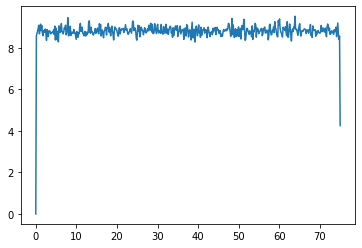

In [28]:
Amplitude=89
quan_noise_approx = white_noise_approx(Amplitude, length, 100, 0)
freq, PSD = welch(quan_noise_approx.T, fs, window='rect', nperseg=1024)

plt.plot(freq, np.mean(PSD, axis=0))
np.mean(PSD)

In [26]:
Amplitude**2/6/fs

8.801111111111112